# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 1

Load an image (any image that contains faces).

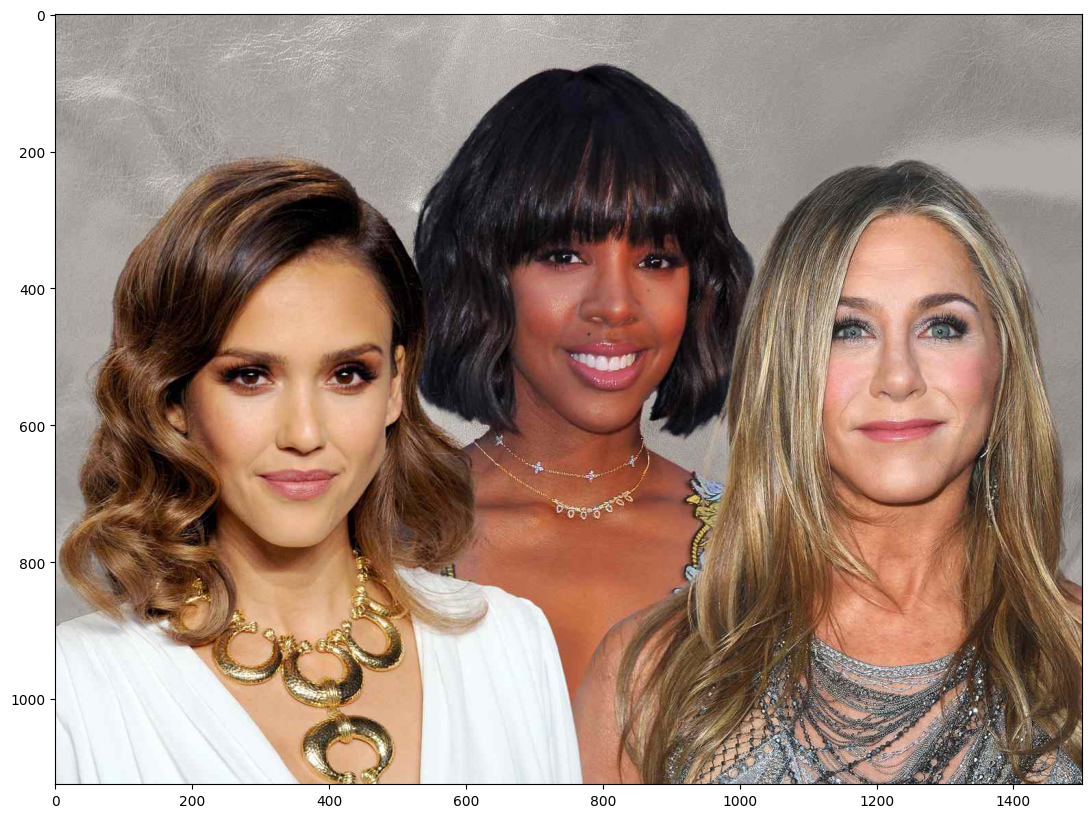

In [28]:
img = cv2.imread('data/faces.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

### Step 2

Load the dlib face predictor.

In [29]:
import dlib
detector = dlib.get_frontal_face_detector()

### Step 3

Run the predictor on your image.

In [30]:
rects = detector(img, 1)

print('Number of detected faces:', len(rects))
print(rects)
print(rects[0].left)

Number of detected faces: 3
rectangles[[(205, 455) (526, 776)], [(1061, 384) (1382, 705)], [(676, 290) (943, 558)]]
<bound method PyCapsule.left of rectangle(205,455,526,776)>


### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

(<Axes: title={'center': 'dlib'}>,
 Text(0.5, 1.0, 'dlib'))

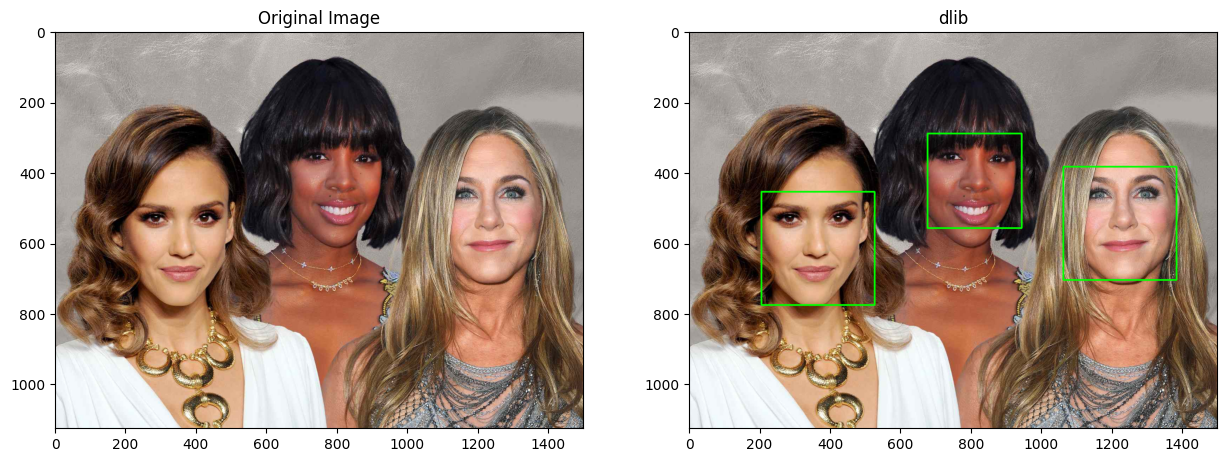

In [33]:
def rect_to_bb(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)


def draw_rects(img, rects, line=3):
    result_dlib = np.copy(img)
    faces_dlib_img = []
    for rect in rects:
        x, y, w, h = rect_to_bb(rect)
        cv2.rectangle(result_dlib, (x, y), (x+w, y+h), (0, 255, 0), line)
        faces_dlib_img.append(img[y:y+h, x:x+w, :])

    return result_dlib

def detect_faces(img, line=3):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    rects = detector(gray, 1)
    return draw_rects(img, rects, line)


result_dlib = detect_faces(img)

plt.subplot(121), plt.imshow(img), plt.title('Original Image')
plt.subplot(122), plt.imshow(result_dlib), plt.title('dlib')

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

(<Axes: title={'center': 'dlib'}>,
 Text(0.5, 1.0, 'dlib'))

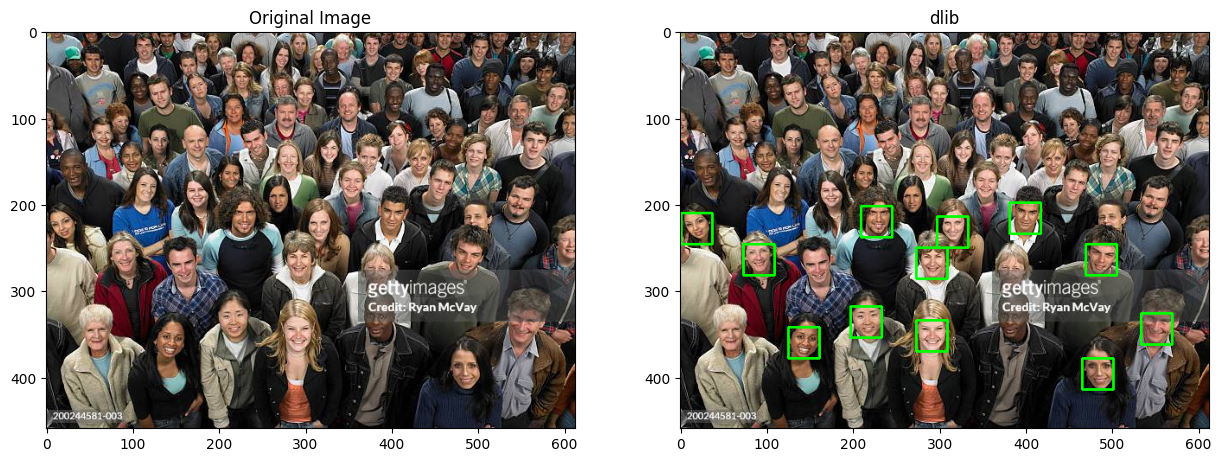

In [34]:
img2 = cv2.imread('data/faces2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

detected_faces = detect_faces(img2, 2)

plt.subplot(121), plt.imshow(img2), plt.title('Original Image')
plt.subplot(122), plt.imshow(detected_faces), plt.title('dlib')

(<Axes: title={'center': 'dlib'}>,
 Text(0.5, 1.0, 'dlib'))

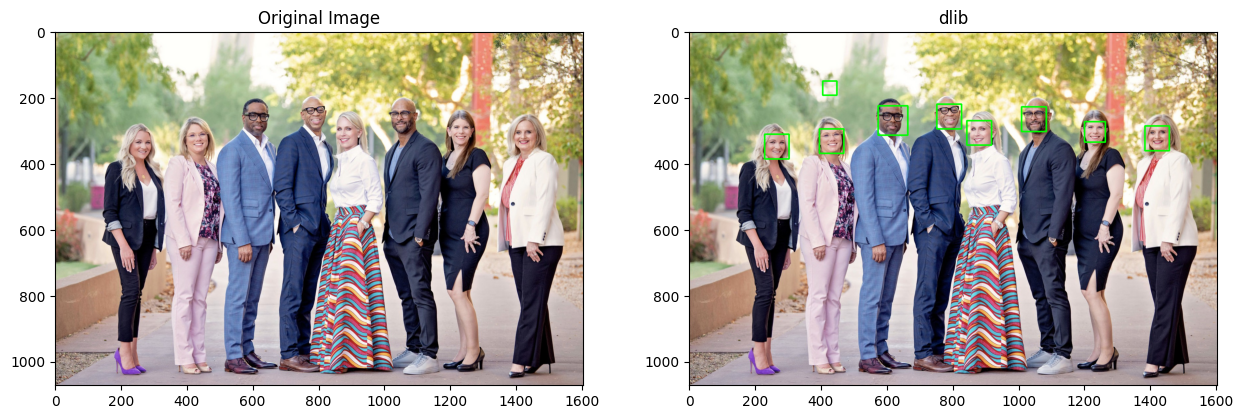

In [39]:
img3 = cv2.imread('data/faces3.jpeg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

detected_faces = detect_faces(img3)

plt.subplot(121), plt.imshow(img3), plt.title('Original Image')
plt.subplot(122), plt.imshow(detected_faces), plt.title('dlib')

(<Axes: title={'center': 'dlib'}>,
 Text(0.5, 1.0, 'dlib'))

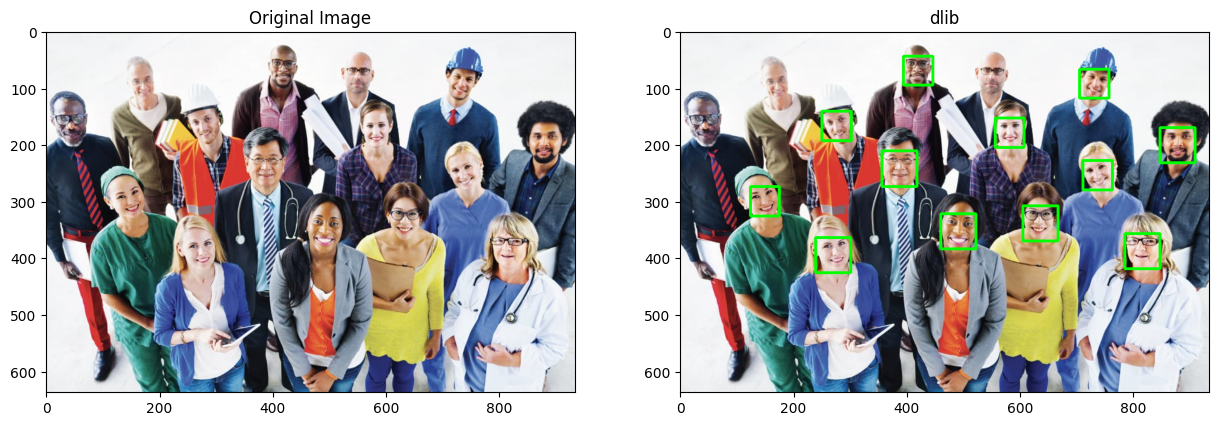

In [38]:
img4 = cv2.imread('data/faces4.jpg')
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

detected_faces = detect_faces(img4, 3)

plt.subplot(121), plt.imshow(img4), plt.title('Original Image')
plt.subplot(122), plt.imshow(detected_faces), plt.title('dlib')